In [1]:
import numpy as np
import pandas as pd

import subprocess
import os
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data & basic analysis

**We will use pandas for data loading and analysis**

If you are new to the pandas, please consult 
http://pandas.pydata.org/pandas-docs/stable/10min.html
or any other tutorial 

if you are familar with SQL, this can help:
http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

In [2]:
video_info = pd.read_csv('../../../data/trafficdb/info.csv')

In [3]:
video_info.head(20)

,filename,date,timestamp,direction,day/night,weather,start_frame,number_of_frames,class,notes
0,cctv052x2004080516x01638,20040805,16.01638,south,day,overcast,2,53,medium,NaN
1,cctv052x2004080516x01639,20040805,16.01639,south,day,overcast,2,53,medium,NaN
2,cctv052x2004080516x01640,20040805,16.01640,south,day,overcast,2,48,light,NaN
3,cctv052x2004080516x01641,20040805,16.01641,south,day,overcast,2,52,medium,NaN
4,cctv052x2004080516x01642,20040805,16.01642,south,day,overcast,2,51,medium,NaN
5,cctv052x2004080516x01643,20040805,16.01643,south,day,overcast,2,53,medium,NaN
6,cctv052x2004080516x01644,20040805,16.01644,south,day,clear,2,53,medium,NaN
7,cctv052x2004080516x01645,20040805,16.01645,south,day,overcast,2,52,medium,NaN
8,cctv052x2004080516x01646,20040805,16.01646,south,day,overcast,2,49,heavy,NaN
9,cctv052x2004080516x01647,20040805,16.01647,south,day,overcast,2,52,medium,NaN


**some analysis**

In [4]:
video_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 10 columns):
filename            254 non-null object
date                254 non-null int64
timestamp           254 non-null float64
direction           254 non-null object
day/night           254 non-null object
weather             254 non-null object
start_frame         254 non-null int64
number_of_frames    254 non-null int64
class               254 non-null object
notes               14 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 21.8+ KB


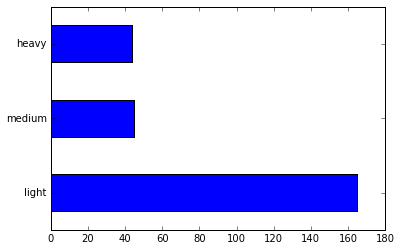

In [5]:
video_info['class'].value_counts().plot(kind='barh')

**Make name of the video less cryptic**

In [6]:
new_names = ["v%03d" % i for i in range(video_info.shape[0])]
print new_names

['v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v033', 'v034', 'v035', 'v036', 'v037', 'v038', 'v039', 'v040', 'v041', 'v042', 'v043', 'v044', 'v045', 'v046', 'v047', 'v048', 'v049', 'v050', 'v051', 'v052', 'v053', 'v054', 'v055', 'v056', 'v057', 'v058', 'v059', 'v060', 'v061', 'v062', 'v063', 'v064', 'v065', 'v066', 'v067', 'v068', 'v069', 'v070', 'v071', 'v072', 'v073', 'v074', 'v075', 'v076', 'v077', 'v078', 'v079', 'v080', 'v081', 'v082', 'v083', 'v084', 'v085', 'v086', 'v087', 'v088', 'v089', 'v090', 'v091', 'v092', 'v093', 'v094', 'v095', 'v096', 'v097', 'v098', 'v099', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124',

In [7]:
video_info['videoname'] = pd.Series(new_names, index=video_info.index)

In [8]:
video_info.head()

,filename,date,timestamp,direction,day/night,weather,start_frame,number_of_frames,class,notes,videoname
0,cctv052x2004080516x01638,20040805,16.01638,south,day,overcast,2,53,medium,NaN,v000
1,cctv052x2004080516x01639,20040805,16.01639,south,day,overcast,2,53,medium,NaN,v001
2,cctv052x2004080516x01640,20040805,16.01640,south,day,overcast,2,48,light,NaN,v002
3,cctv052x2004080516x01641,20040805,16.01641,south,day,overcast,2,52,medium,NaN,v003
4,cctv052x2004080516x01642,20040805,16.01642,south,day,overcast,2,51,medium,NaN,v004


**and finally move the last (added column to the front)**

In [9]:
cols = video_info.columns.tolist()
cols

['filename',
 'date',
 'timestamp',
 'direction',
 'day/night',
 'weather',
 'start_frame',
 'number_of_frames',
 'class',
 'notes',
 'videoname']

In [10]:
cols = cols[-1:] + cols[:-1]
video_info = video_info[cols]

In [11]:
video_info.head()

,videoname,filename,date,timestamp,direction,day/night,weather,start_frame,number_of_frames,class,notes
0,v000,cctv052x2004080516x01638,20040805,16.01638,south,day,overcast,2,53,medium,NaN
1,v001,cctv052x2004080516x01639,20040805,16.01639,south,day,overcast,2,53,medium,NaN
2,v002,cctv052x2004080516x01640,20040805,16.01640,south,day,overcast,2,48,light,NaN
3,v003,cctv052x2004080516x01641,20040805,16.01641,south,day,overcast,2,52,medium,NaN
4,v004,cctv052x2004080516x01642,20040805,16.01642,south,day,overcast,2,51,medium,NaN


**Now, we will turn video into the images!**

delete the folder if it exists and create a new one

In [12]:
import shutil
shutil.rmtree('../../../data/DOF_images/')

OSError: [Errno 2] No such file or directory: '../../../data/DOF_images/'

In [13]:
os.makedirs('../../../data/DOF_images/')

make some list out of our pandas data frame:

In [14]:
file_names = video_info['filename'].tolist()
video_names = video_info['videoname'].tolist()

number_frames = video_info['number_of_frames'].tolist()
class_list = video_info['class'].tolist()

In [15]:
print number_frames
print sum(number_frames)

[53, 53, 48, 52, 51, 53, 53, 52, 49, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 51, 51, 53, 53, 52, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 49, 52, 53, 52, 52, 52, 51, 53, 53, 53, 53, 51, 52, 53, 53, 47, 53, 52, 53, 53, 50, 52, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 52, 53, 52, 53, 51, 53, 52, 53, 50, 53, 53, 53, 53, 52, 52, 52, 53, 52, 53, 50, 53, 50, 53, 53, 53, 53, 52, 52, 53, 51, 53, 53, 53, 53, 53, 53, 50, 53, 53, 53, 51, 52, 52, 53, 53, 53, 53, 53, 53, 53, 51, 52, 53, 53, 53, 53, 53, 52, 53, 53, 50, 51, 53, 53, 52, 53, 53, 53, 48, 53, 53, 53, 53, 51, 52, 53, 53, 53, 53, 53, 53, 50, 53, 53, 53, 53, 52, 53, 52, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 49, 44, 50, 53, 53, 53, 53, 53, 53, 53, 53, 48, 53, 53, 53, 52, 53, 53, 53, 52, 52, 53, 53, 50, 53, 52, 53, 43, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 52, 53, 53, 52, 53, 52, 53, 53,

it turns out that the number of frames does not match with the output, that is why we create additional list *number_frames_correct*

In [16]:
file_names

['cctv052x2004080516x01638',
 'cctv052x2004080516x01639',
 'cctv052x2004080516x01640',
 'cctv052x2004080516x01641',
 'cctv052x2004080516x01642',
 'cctv052x2004080516x01643',
 'cctv052x2004080516x01644',
 'cctv052x2004080516x01645',
 'cctv052x2004080516x01646',
 'cctv052x2004080516x01647',
 'cctv052x2004080516x01648',
 'cctv052x2004080516x01649',
 'cctv052x2004080516x01650',
 'cctv052x2004080517x01652',
 'cctv052x2004080517x01653',
 'cctv052x2004080517x01654',
 'cctv052x2004080517x01655',
 'cctv052x2004080517x01656',
 'cctv052x2004080517x01657',
 'cctv052x2004080517x01658',
 'cctv052x2004080517x01659',
 'cctv052x2004080517x01660',
 'cctv052x2004080517x01661',
 'cctv052x2004080517x01662',
 'cctv052x2004080517x01663',
 'cctv052x2004080517x01664',
 'cctv052x2004080517x01665',
 'cctv052x2004080518x01666',
 'cctv052x2004080518x01667',
 'cctv052x2004080518x01668',
 'cctv052x2004080518x01669',
 'cctv052x2004080518x01670',
 'cctv052x2004080518x01671',
 'cctv052x2004080518x01672',
 'cctv052x2004

In [17]:
number_frames_correct = []
print number_frames_correct

[]


In [18]:
len(os.listdir('../../../data/DOF_images/'))

0

In [23]:
########################
#import numpy as np
#import pandas as pd
#import os
#import cv2
#from scipy.misc import imread, imsave, imresize
########################

def vtDOF():
    prev_number_files = len(os.listdir('../../../data/DOF_images/'))
    videos = os.listdir('../../../data/trafficdb/video/')
    n = 0
    #for (fname, vname) in zip(file_names, video_names):
    while n != len(videos):
        cap = cv2.VideoCapture('../../../data/trafficdb/video/' + file_names[n] + '.avi')

        ret, frame1 = cap.read()
        prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        hsv = np.zeros_like(frame1)
        hsv[..., 1] = 255

        i = 1
        while (cap.isOpened()):
            ret, frame2 = cap.read()
            if ret is False:
                break
            next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs, next , float(0) , 0.5, 3, 15, 3, 5, 1.2, 0)

            mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            hsv[..., 0] = ang*180/np.pi/2
            hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            
            iname = '../../../data/DOF_images/' + video_names[n] + '_%02d.jpg' % i
            cv2.imwrite(iname, rgb)
            
            i += 1
            prvs = next
            
        current_number_files = len(os.listdir('../../../data/DOF_images/'))    
        number_frames_correct.append(current_number_files - prev_number_files)
        prev_number_files = current_number_files
        
        print (video_names[n] + ' is divided on frames. Left: ' + str(len(videos) - n) + 
               '\n' + 'Frames correct: ' + str(number_frames_correct[n]))
        n += 1
        cv2.destroyAllWindows()
    print 'Complete!'
%time vtDOF()

v000 is divided on frames. Left: 254
Frames correct: 52
v001 is divided on frames. Left: 253
Frames correct: 52
v002 is divided on frames. Left: 252
Frames correct: 47
v003 is divided on frames. Left: 251
Frames correct: 51
v004 is divided on frames. Left: 250
Frames correct: 50
v005 is divided on frames. Left: 249
Frames correct: 52
v006 is divided on frames. Left: 248
Frames correct: 52
v007 is divided on frames. Left: 247
Frames correct: 51
v008 is divided on frames. Left: 246
Frames correct: 48
v009 is divided on frames. Left: 245
Frames correct: 51
v010 is divided on frames. Left: 244
Frames correct: 52
v011 is divided on frames. Left: 243
Frames correct: 52
v012 is divided on frames. Left: 242
Frames correct: 52
v013 is divided on frames. Left: 241
Frames correct: 52
v014 is divided on frames. Left: 240
Frames correct: 52
v015 is divided on frames. Left: 239
Frames correct: 52
v016 is divided on frames. Left: 238
Frames correct: 52
v017 is divided on frames. Left: 237
Frames corr

sanity check:

number of image files should be equal to $\sum number\_frames\_correst$

In [24]:
sum(number_frames_correct)

13063

In [25]:
len(os.listdir('../../../data/DOF_images/'))

13063

it does !

seems we are on the right track

**To have a reference we will create additional DataFrame**

First, prepare data:

In [26]:
image_names = []
image_class_list = []
image_video_names = []

for (n, vname, c) in zip(number_frames_correct, video_names, class_list):
    image_names += [vname + "_%02d" % i for i in range(1, n + 1)]
    image_video_names += [vname]*n
    image_class_list += [c]*n    

In [27]:
image_info = pd.DataFrame([image_names, image_class_list, image_class_list])

In [28]:
data_dict = {'imagename' : image_names, 'videoname' : image_video_names, 'class' : image_class_list}
image_info = pd.DataFrame(data_dict)
image_info = image_info[['imagename', 'videoname', 'class']]

In [29]:
image_info

,imagename,videoname,class
0,v000_01,v000,medium
1,v000_02,v000,medium
2,v000_03,v000,medium
3,v000_04,v000,medium
4,v000_05,v000,medium
5,v000_06,v000,medium
6,v000_07,v000,medium
7,v000_08,v000,medium
8,v000_09,v000,medium
9,v000_10,v000,medium


** it would be good idea to save two created DataFrames that we can work with them in the future **

Let's do it !

In [30]:
image_info.to_csv('../../../data/DOF_image_info.csv', index = False)

with video, we should be a bit more carefull, don't forget to change *number of frames* to the correst one

In [31]:
video_info['number of frames'] = number_frames_correct

In [32]:
video_info.to_csv('../../../data/DOF_video_info.csv', index = False)

** And in the very end, we will check images, that we just created ! **

In [33]:
from PIL import Image
img = Image.open("../../../data/DOF_images/v000_01.jpg")
arr = np.array(img)

In [34]:
arr.shape

(240, 320, 3)

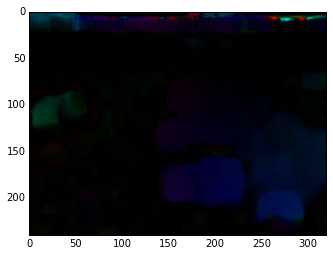

In [35]:
plt.imshow(img)

In [36]:
video_info

,videoname,filename,date,timestamp,direction,day/night,weather,start_frame,number_of_frames,class,notes,number of frames
0,v000,cctv052x2004080516x01638,20040805,16.01638,south,day,overcast,2,53,medium,NaN,52
1,v001,cctv052x2004080516x01639,20040805,16.01639,south,day,overcast,2,53,medium,NaN,52
2,v002,cctv052x2004080516x01640,20040805,16.01640,south,day,overcast,2,48,light,NaN,47
3,v003,cctv052x2004080516x01641,20040805,16.01641,south,day,overcast,2,52,medium,NaN,51
4,v004,cctv052x2004080516x01642,20040805,16.01642,south,day,overcast,2,51,medium,NaN,50
5,v005,cctv052x2004080516x01643,20040805,16.01643,south,day,overcast,2,53,medium,NaN,52
6,v006,cctv052x2004080516x01644,20040805,16.01644,south,day,clear,2,53,medium,NaN,52
7,v007,cctv052x2004080516x01645,20040805,16.01645,south,day,overcast,2,52,medium,NaN,51
8,v008,cctv052x2004080516x01646,20040805,16.01646,south,day,overcast,2,49,heavy,NaN,48
9,v009,cctv052x2004080516x01647,20040805,16.01647,south,day,overcast,2,52,medium,NaN,51
